<a href="https://colab.research.google.com/github/MarianaUARG/DS-1/blob/main/ProyectoDS_ParteI_Uriburu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/MarianaUARG/DS-1.git


Cloning into 'DS-1'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 211.57 KiB | 4.60 MiB/s, done.
Resolving deltas: 100% (5/5), done.


# Proyecto Final - Visualizaciones en Python
Primera Entrega
Archivo: ProyectoDS_ParteI_Uriburu.ipynb

📌 Abstract

En este proyecto trabajamos con el dataset Spotify Songs and Artists Dataset obtenido de Kaggle, que contiene información sobre canciones, géneros, artistas y características acústicas. La base de datos incluye variables como popularidad, duración, tempo, bailabilidad, energía y seguidores de los artistas, permitiendo un análisis detallado del comportamiento musical en la plataforma.

El objetivo principal es aplicar técnicas de visualización y análisis exploratorio de datos para responder preguntas clave sobre la popularidad de los géneros, la relación entre energía y éxito de una canción, y si los artistas con más seguidores tienen patrones definidos en su música. Para ello se aplican técnicas de análisis univariado, bivariado y multivariado, utilizando herramientas como Matplotlib, Seaborn y pandas.

El análisis incluye una limpieza previa de datos, identificación de valores perdidos y selección de variables relevantes. Luego, se desarrollan visualizaciones que permiten explorar tendencias, distribuciones y correlaciones. Este análisis exploratorio servirá como base para futuros estudios de predicción, segmentación o recomendaciones musicales.

❓ Preguntas de interés / Hipótesis
- ¿Cuál es el género musical más reproducido en Spotify?
- ¿Existe una relación entre la energía de una canción y su nivel de popularidad según el género?
- ¿Los artistas con más seguidores suelen tener canciones con características similares?
- ¿Qué factores influyen en la popularidad de una canción?
- ¿Los géneros musicales tienen patrones definidos en su energía y popularidad?


📊 Visualizaciones y Análisis


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv("/content/DS-1/spotifydataset.csv")
df.head()

,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,...,0.646,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842
1,1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,...,0.630,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998
2,2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,...,0.362,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726
3,3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),2020-03-20,191013,...,0.825,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091
4,4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,2024-03-08,214994,...,0.775,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998


1. Análisis Univariado

   Géneros musicales

In [49]:
# Diccionario de mapeo de géneros en categorías más amplias
genre_mapping = {
    "pop": ["pop", "dance pop", "electropop", "art pop", "synth pop"],
    "rock": ["rock", "alternative rock", "classic rock", "garage rock", "hard rock", "punk"],
    "rap": ["rap", "hip hop", "trap", "melodic rap", "gangster rap"],
    "reggaeton": ["reggaeton", "trap latino", "urbano latino"],
    "electronic": ["electro house", "edm", "progressive house", "big room", "dutch house"]
}

In [78]:
def map_genre(genre_list):
    genre_list = str(genre_list).lower()

    for broad_genre, keywords in genre_mapping.items():
        if any(keyword in genre_list for keyword in keywords):
            return broad_genre
    return "other"

df["genres_grouped"] = df["genres"].apply(map_genre)

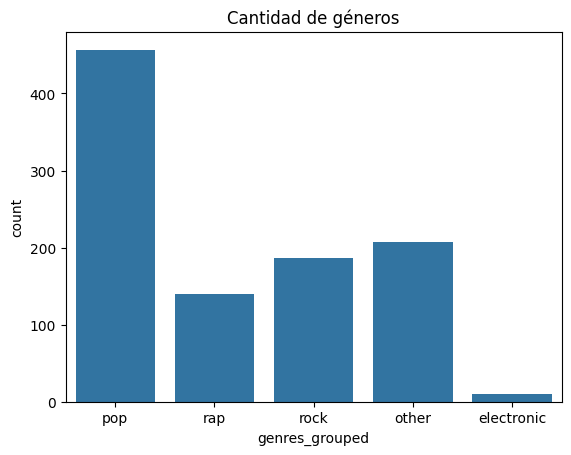

In [51]:
sns.countplot(x='genres_grouped', data=df)
plt.title('Cantidad de géneros')
plt.show()

2. Análisis Bivariado

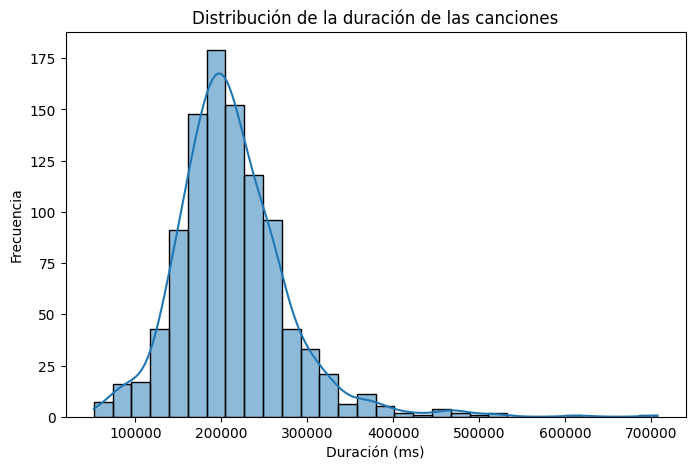

In [ ]:
# Histograma de duración de canciones
plt.figure(figsize=(8,5))
sns.histplot(df['duration_ms'], bins=30, kde=True)
plt.title("Distribución de la duración de las canciones")
plt.xlabel("Duración (ms)")
plt.ylabel("Frecuencia")
plt.show()



👉 **Interpretación:** El pico de frecuencia se encuentra alrededor de 200,000 ms (~3.3 minutos), lo que indica que este es el tiempo de duración más común en el dataset. Adicionalmente, la curva de densidad sugiere que hay una distribución moderadamente simétrica, aunque con una ligera tendencia a canciones más cortas en comparación con las más largas.


Gráfico de barras Popularidad Top 10 de géneros musicales

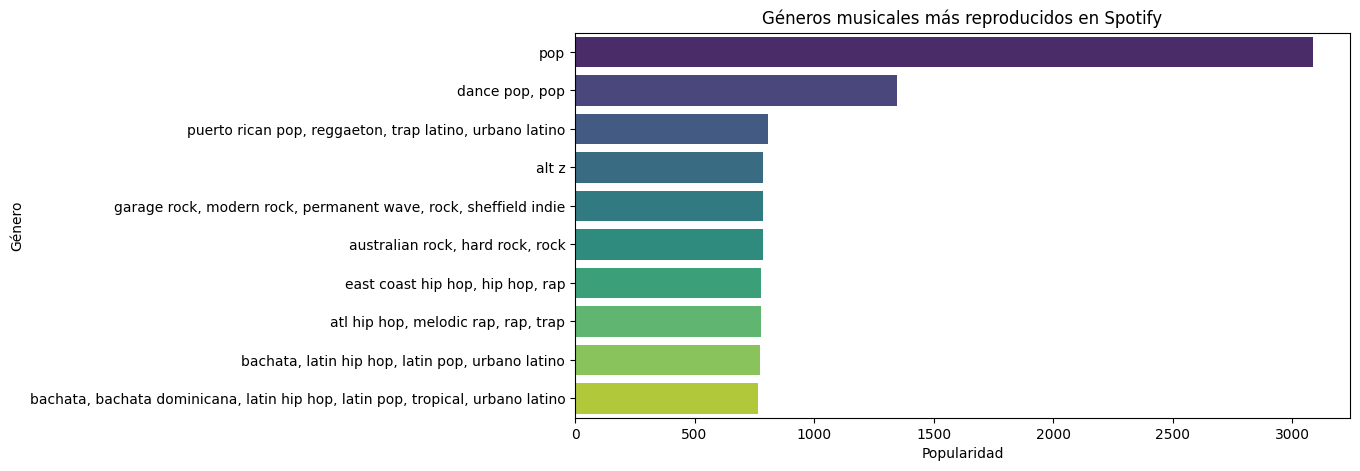

In [18]:
# Agrupar por género y sumar las reproducciones
top_genres = df.groupby("genres")["track_popularity"].sum().sort_values(ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(y=top_genres.index, x=top_genres.values, hue=top_genres.index, palette="viridis", legend=False)
plt.title("Géneros musicales más reproducidos en Spotify")
plt.xlabel("Popularidad")
plt.ylabel("Género")
plt.show()



👉 Interpretación: Se observa que el género musical *Pop* es el más reproducido en Spotify, seguido de *Dance Pop, Reggaetón y Trap Latino,* lo que indica una fuerte tendencia hacia los géneros urbanos y electrónicos. Además, se aprecia que géneros como *Rock y Hip Hop* presentan una distribución más diversa, reflejando una variabilidad en su éxito comercial. La presencia de subgéneros sugiere que la música en Spotify tiene una oferta variada que responde a diferentes preferencias de los oyentes.



Popularidad según el género musical




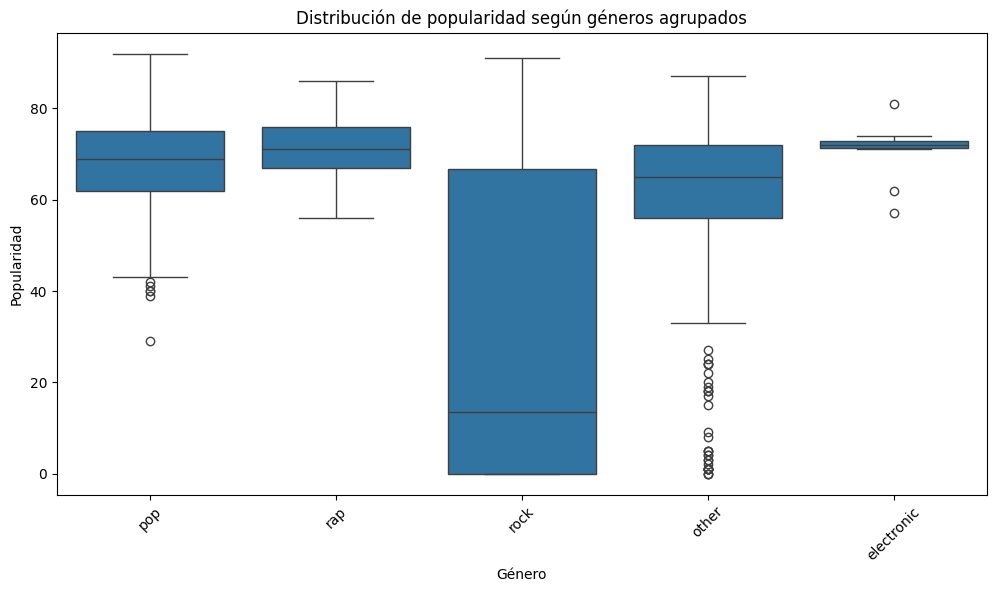

In [79]:
# Boxplot: Popularidad según el género musical
plt.figure(figsize=(12,6))
sns.boxplot(x=df["genres_grouped"], y=df["track_popularity"])
plt.xticks(rotation=45)
plt.title("Distribución de popularidad según géneros agrupados")
plt.xlabel("Género")
plt.ylabel("Popularidad")
plt.show()


👉  **Interpretación:** se observa que el género *electronic* parece ser el más estable en términos de popularidad, mientras que rock presenta una mayor variabilidad en el éxito de sus canciones. *Pop y rap* tienen una distribución similar, lo que indica que estos géneros tienden a recibir una cantidad equilibrada de atención, mientras que el grupo *other* incluye géneros menos reproducidos en promedio.


3. Análisis Multivariado

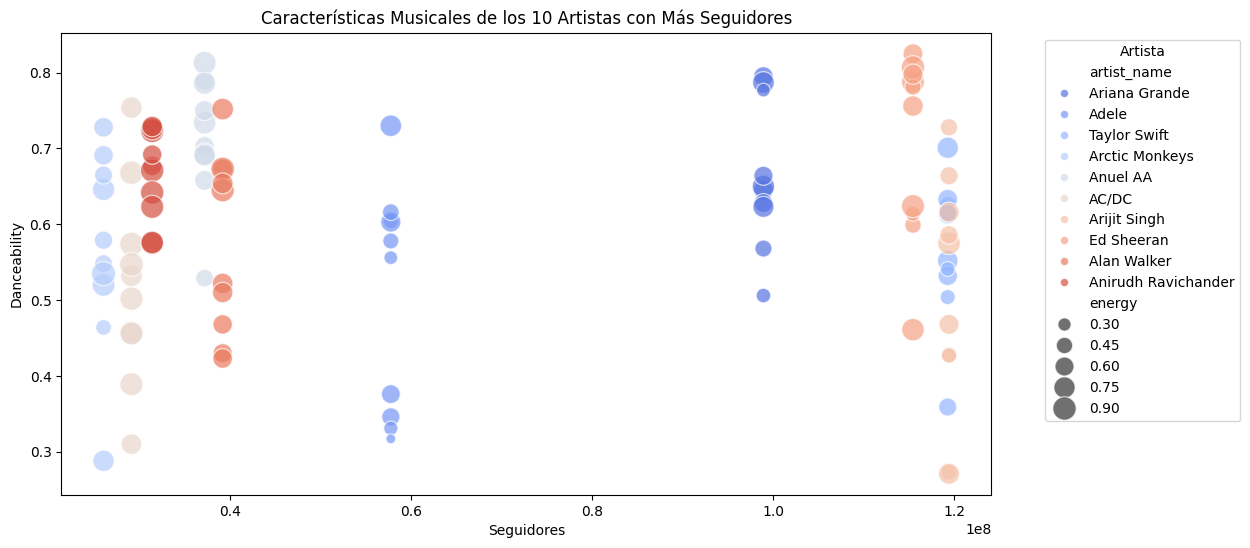

In [72]:
# Obtener los 10 artistas con más seguidores
top_artists = df.groupby("artist_name")["followers"].mean().sort_values(ascending=False).head(10).index
df_filtered = df[df["artist_name"].isin(top_artists)]

df["followers"] = pd.to_numeric(df["followers"], errors="coerce")


# Crear el gráfico de dispersión
plt.figure(figsize=(12,6))
sns.scatterplot(x=df_filtered["followers"], y=df_filtered["danceability"], hue=df_filtered["artist_name"], size=df_filtered["energy"],
                alpha=0.7, palette="coolwarm", sizes=(50,300))

plt.title("Características Musicales de los 10 Artistas con Más Seguidores")
plt.xlabel("Seguidores")
plt.ylabel("Danceability")
plt.legend(title="Artista", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


👉 Interpretación: el gráfico sugiere que los artistas con muchos seguidores suelen tener canciones con alta bailabilidad y energía, pero con cierta diversidad dentro de cada estilo.


Características musicales

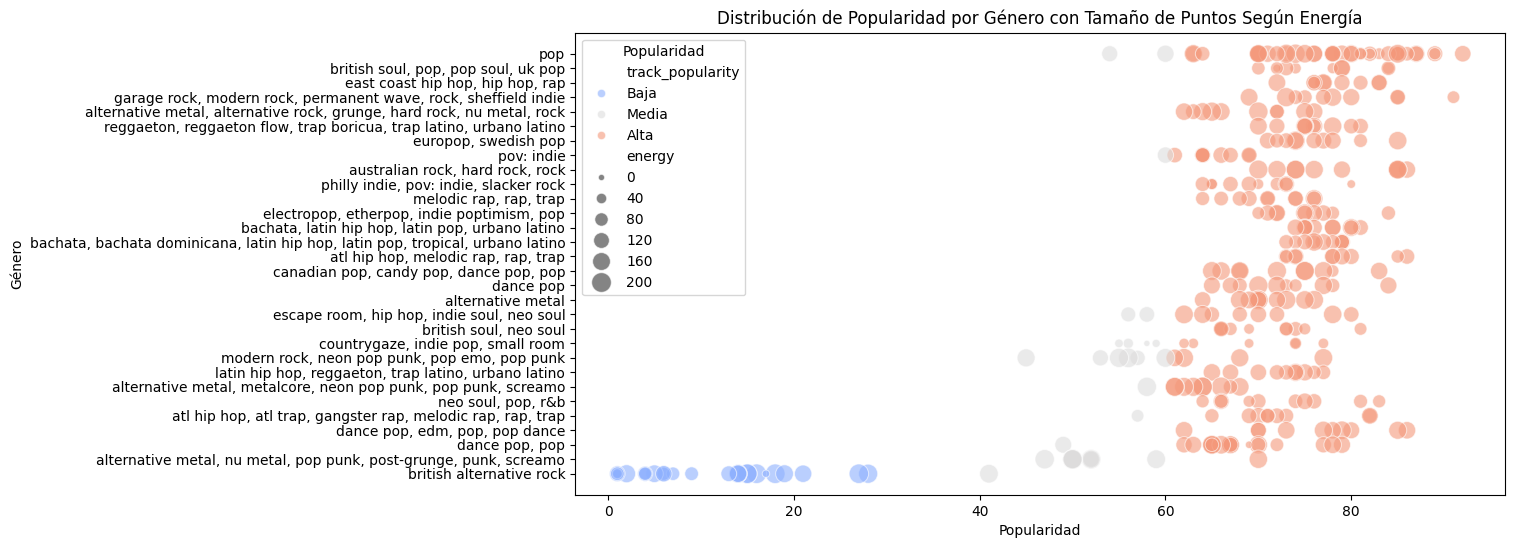

In [60]:
# Filtrar los 30 géneros más comunes
top_genres = df["genres"].value_counts().index[:30]
df_filtered = df[df["genres"].isin(top_genres)]

# Normalizar el tamaño de los puntos (energía)
size_values = (df_filtered["energy"] - df_filtered["energy"].min()) / (df_filtered["energy"].max() - df_filtered["energy"].min()) * 200

# Crear el scatterplot
plt.figure(figsize=(12,6))
sns.scatterplot(y=df_filtered["genres"], x=df_filtered["track_popularity"], hue=pd.cut(df_filtered["track_popularity"], bins=[0,30,60,100], labels=["Baja", "Media", "Alta"]),
                size=size_values, alpha=0.6, palette="coolwarm", sizes=(20,200))

plt.title("Distribución de Popularidad por Género con Tamaño de Puntos Según Energía")
plt.xlabel("Popularidad")
plt.ylabel("Género")
plt.legend(title="Popularidad")
plt.show()


👉 **Diagnóstico:** Al cruzar tres variables, se observa que la *popularidad* de las canciones varía según su *energía* y el *género musical*. Los géneros con *alta popularidad* suelen estar asociados a canciones con *mayor energía*, lo que sugiere una preferencia por temas más dinámicos. En cambio, los géneros con *baja popularidad* presentan una distribución más diversa, con canciones de distintos niveles de energía, lo que indica que otros factores pueden influir en su éxito. Además, se aprecia una tendencia en la que ciertos géneros muestran una mayor concentración en rangos específicos de popularidad y energía, sugiriendo una posible relación entre el estilo musical y la respuesta del público.


<ipython-input-47-32307069>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["genres_grouped"], y=df["energy"], inner="quartile", palette="coolwarm")


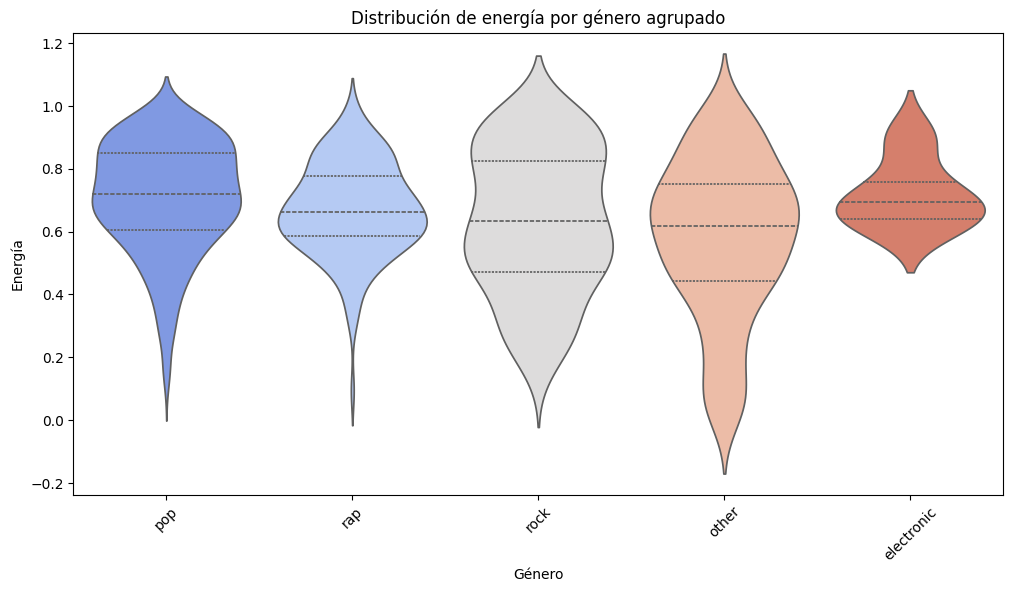

In [47]:
# Crear gráfico de violín
plt.figure(figsize=(12,6))
sns.violinplot(x=df["genres_grouped"], y=df["energy"], inner="quartile", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribución de energía por género agrupado")
plt.xlabel("Género")
plt.ylabel("Energía")
plt.show()

👉 **Diagnóstico:** Al cruzar las variables género, energía y distribución de los valores en cada género, se observa que ciertos géneros como *Electronic* tienden a concentrarse en valores altos de energía, lo que indica una mayor uniformidad en su intensidad. Por otro lado, *Rock* y *Rap* presentan una distribución más dispersa, reflejando una mayor variabilidad en la intensidad de sus canciones, desde temas suaves hasta muy enérgicos. *Pop* mantiene una distribución equilibrada con presencia de canciones de baja y alta energía, mientras que los géneros agrupados en *Other* tienden a tener niveles de energía más moderados. Estos patrones sugieren que la energía de las canciones está influenciada tanto por el género como por la diversidad dentro de cada categoría.


✅ Conclusiones preliminares

*   El género más popular es pop.
*   La duraciòn promedio de una canciòn es de 200,000 ms (~3.3 minutos).
*   Los artistas con más seguidores tienden a producir canciones con alta bailabilidad y energía, aunque hay diversidad dentro de cada estilo.
*   La popularidad de una canción está influenciada por su energía y género, al ser los temas más dinámicos y enérgicos los que tienden a captar más atención del público.

Estas conclusiones preliminares pueden servir como base para estudios más profundos sobre el comportamiento de las canciones en plataformas de streaming.

🧼 Valores Perdidos



In [27]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0
genres,163


In [29]:
# Calcular el porcentaje de valores perdidos en la columna 'genre'
missing_genre = df['genres'].isna().sum()
total_rows = len(df)
missing_percentage = (missing_genre / total_rows) * 100

print(f"Porcentaje de valores faltantes en 'genre': {missing_percentage:.2f}%")

Porcentaje de valores faltantes en 'genre': 16.30%


👉 Se observa que hay valores faltantes en columnas de 'genres'. Dado que el porcentaje es elevado, se imputarán valores razonables, en base al género más frecuente del 'artist_name'.

Acciones que podria realizar para mi dataset

Datos faltantes

In [32]:
# Calcular el género más frecuente por artista
genre_mapping = df.groupby("artist_name")["genres"].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Rellenar los valores faltantes en 'genre' con el género más frecuente de cada artista
df["genres"] = df.apply(lambda row: genre_mapping[row["artist_name"]] if pd.isna(row["genres"]) else row["genres"], axis=1)

# Verificar si aún quedan valores nulos
print(f"Valores nulos restantes en 'genres': {df['genres'].isna().sum()}")

Valores nulos restantes en 'genres': 67


In [33]:
# Calcular el porcentaje de valores perdidos en la columna 'genre'
missing_genre = df['genres'].isna().sum()
total_rows = len(df)
missing_percentage = (missing_genre / total_rows) * 100

print(f"Porcentaje de valores faltantes en 'genre': {missing_percentage:.2f}%")

Porcentaje de valores faltantes en 'genre': 6.70%


Conversión de duración de canciones a minutos

In [38]:
# Convertir la duración de milisegundos a minutos
df["duration_min"] = df["duration_ms"] / 60000

# Mostrar las primeras filas para verificar la conversión
print(df[["duration_ms", "duration_min"]].head())


   duration_ms  duration_min
0       228639      3.810650
1       173639      2.893983
2        92400      1.540000
3       191013      3.183550
4       214994      3.583233
